In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [3]:
Poisson_generator = np.random.exponential(scale=1/10, size=25)
Poisson_generator

array([0.17571781, 0.07065993, 0.06239596, 0.05265322, 0.09064247,
       0.16488326, 0.09731804, 0.0253628 , 0.05383932, 0.00500449,
       0.23507321, 0.03373031, 0.0368157 , 0.04090478, 0.18211707,
       0.06843501, 0.178239  , 0.17572744, 0.12266572, 0.07050753,
       0.03751278, 0.24680794, 0.14954752, 0.09598652, 0.02887073])

In [4]:
def poisson_generator(lamb, T, t):
    if t is not None :
        return ( np.random.exponential(1/lamb, T) [t])
    else:
        return ( np.random.exponential(1/lamb, T) )

In [5]:
poisson_generator(10, 50, 9)

0.03942357481883762

In [6]:
def estimate_lamb (P):
    return ( 1/ np.mean(P) )

In [7]:
estimate_lamb( poisson_generator (10, 50, t = None))

13.345597211812914

In [8]:
SHA4 = []
with open('SHAM4_replicates.txt', 'r') as file:
    for lines in file:
        SHA4.append([float(e) for e in lines[:-1].split(",")])

In [9]:
SHA5 = []
with open('SHAM5_replicates.txt', 'r') as file:
    for lines in file:
        SHA5.append([float(e) for e in lines[:-1].split(",")])

In [10]:
for experience in SHA4:
    print(experience, "\n")

[389.0023, 389.003595, 389.030165, 389.03623999999996, 389.06207, 389.10463, 389.146245, 389.199615, 389.230345, 389.26041499999997, 389.295685, 389.313835, 389.35036, 389.366205, 389.408095, 389.42697000000004, 389.4639, 389.508475, 389.53495, 389.5638, 389.588955, 389.6419, 389.68087, 389.701705, 389.739755, 389.80616000000003, 389.840685, 389.859685, 389.88241, 389.92060499999997, 389.94877, 389.973945] 

[390.0023, 390.00354500000003, 390.00530499999996, 390.03628, 390.06221, 390.12792, 390.148555, 390.180995, 390.21714, 390.253765, 390.30978999999996, 390.335895, 390.36546, 390.39992, 390.418585, 390.44858500000004, 390.50476499999996, 390.525895, 390.56403, 390.60323, 390.633265, 390.69732, 390.72091, 390.737345, 390.780755, 390.80876, 390.837925, 390.87716, 390.91197, 390.92731000000003, 390.97314500000005] 

[391.0022, 391.0035, 391.00595, 391.029135, 391.040005, 391.096865, 391.138165, 391.179925, 391.221955, 391.25682, 391.290905, 391.34407999999996, 391.363825, 391.412045000

In [11]:
def epochs(array, limit):
    res = []
    for i in range ( len (array) ):
        sublist = []
        for j in range(len(array[i])-1):
            if ( array[i][j+1]-array[i][0] <= limit) :
                sublist.append(array[i][j+1]-array[i][0]) 
        res.append(sublist)
    return (res)

In [12]:
SHA4_times = epochs(SHA4, limit = 0.1)
SHA5_times =  epochs(SHA5, limit = 0.1)

In [13]:
SHA4_times

[[0.0012950000000273576,
  0.02786500000001979,
  0.03393999999997277,
  0.059770000000014534],
 [0.0012450000000399086,
  0.003004999999973279,
  0.033979999999985466,
  0.05991000000000213],
 [0.0012999999999578904,
  0.0037499999999681677,
  0.02693499999998039,
  0.03780499999999165,
  0.09466499999996358],
 [0.00130500000000211,
  0.028304999999988922,
  0.04719500000004473,
  0.0901850000000195],
 [0.0006350000000452383,
  0.030300000000011096,
  0.038975000000050386,
  0.07217000000002827],
 [0.0012649999999894135, 0.0307549999999992, 0.0417550000000233],
 [0.0012700000000336331,
  0.027495000000044456,
  0.0338249999999789,
  0.09343499999999949],
 [0.001274999999964166,
  0.028479999999944994,
  0.03460499999999911,
  0.06366499999995767],
 [0.0012799999999515421,
  0.029864999999972497,
  0.046269999999992706,
  0.07438500000000658],
 [0.0012850000000526052,
  0.027825000000007094,
  0.040625000000034106,
  0.07893000000001393],
 [0.001289999999983138, 0.027445000000000164, 0

In [14]:
len(SHA4_times)

50

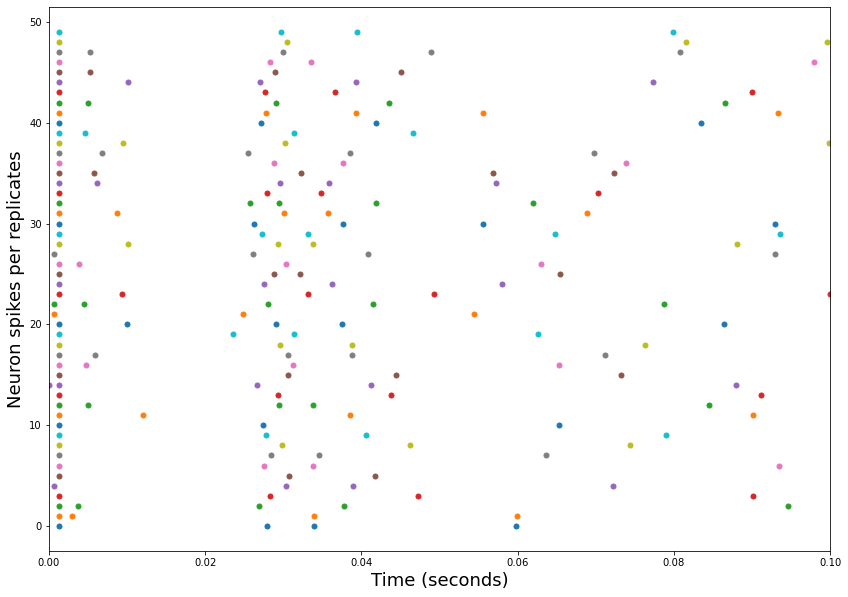

In [15]:
plt.figure(figsize=(14,10))
for i, spiketrain in enumerate(SHA4_times):
        plt.plot(spiketrain, i * np.ones_like(spiketrain), '.', markersize=10)
        
plt.xlim(0, 0.10)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)
plt.show()

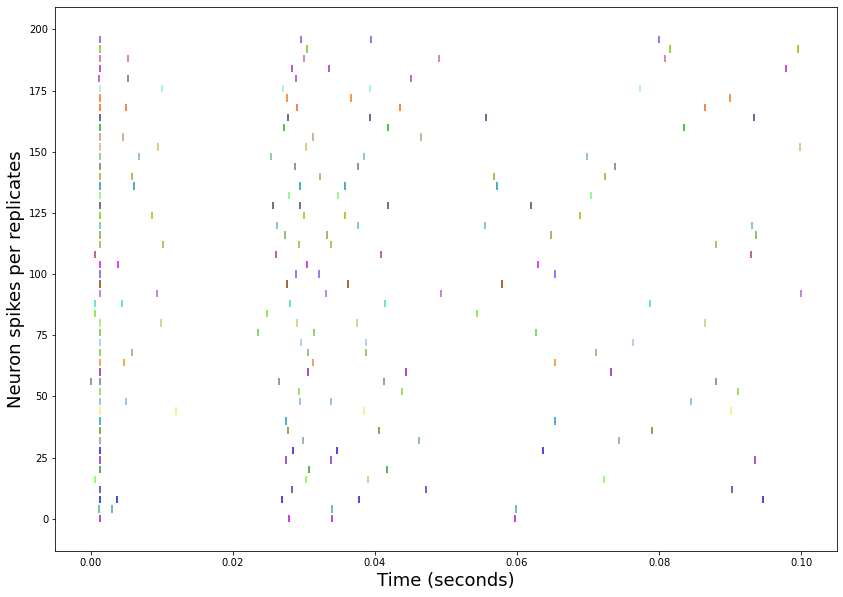

In [16]:
# Autre visualisation avec eventplot() :

plt.figure(figsize=(14,10))

colors = [ "#"+"".join([random.choice ("0123456789ABCDEF") for j in range(6)] )
           for i in range (len(SHA4_times)) ]

plt.eventplot(SHA4_times, color = colors, lineoffsets = 4 , linelengths= 3)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)
plt.show()

In [17]:
SHA4_times2 = sorted(np.concatenate(SHA4_times))

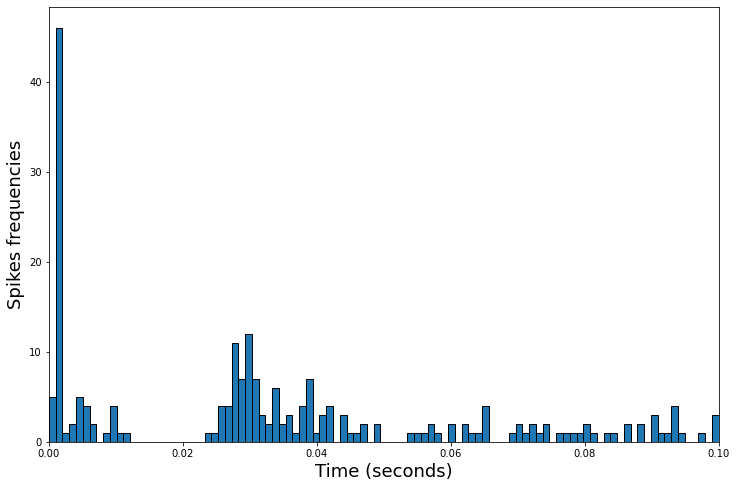

In [18]:
plt.figure(figsize=(12, 8))
bins = np.linspace(0, 0.1, 100)
plt.xlim(0, 0.1)
plt.hist(SHA4_times2, bins= bins, edgecolor="black")
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)
plt.show()

In [19]:
count = np.histogram(SHA4_times2, bins=bins)[0]
print(count)

[ 5 46  1  2  5  4  2  0  1  4  1  1  0  0  0  0  0  0  0  0  0  0  0  1
  1  4  4 11  7 12  7  3  2  6  2  3  1  4  7  1  3  4  0  3  1  1  2  0
  2  0  0  0  0  1  1  1  2  1  0  2  0  2  1  1  4  0  0  0  1  2  1  2
  1  2  0  1  1  1  1  2  1  0  1  1  0  2  0  2  0  3  1  1  4  1  0  0
  1  0  3]


In [20]:
lambda1 = estimate_lamb(count)
print(lambda1)

0.45833333333333337


### Non homogeneous poisson process :

$ P_{N_{[t_a, t_b]} } (k) = \frac { \left(  \int_{t_a}^{t_b} \lambda (t) dt   \right) ^ n }{ k!} \times e ^{- \int_{t_a}^{t_b} \lambda (t) dt }$

In [21]:
# On definit notre fonction lambda(t) pour la simulation non-homogène
def my_function(x):
    y =  math.log(0.5*x) - 0.9*math.cos(x) + math.exp(-0.825*x) - 0.25*x/2 +0.4

    return ( abs(y) )# car lambda doit appartenir à R*+

In [22]:
def poisson_inhm_generator(T):
    time = np.linspace(0.01, 10, T)
    spikes = []
    lambda_ = []
    
    for t in time:
        lambda_.append( (my_function(t)) )
        
    for l in lambda_:
        spikes.append( sorted ( abs( (np.random.exponential(1/l, T) ) ) ) )
        
    return (spikes, lambda_)

In [23]:
spikes, lambda1 = poisson_inhm_generator(100)
spikes_times = epochs(spikes, limit=0.1)
spikes_times2 = sorted( np.concatenate (spikes_times) )

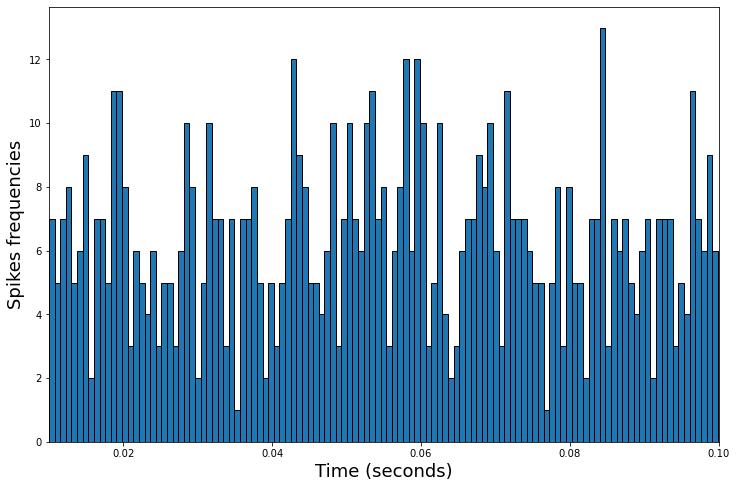

In [24]:
bins = np.linspace(0.01, max(spikes_times2), 120)
plt.figure(figsize=(12, 8))
plt.xlim(0.01, 0.1)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)
plt.hist(spikes_times2, bins = bins , edgecolor = "black" )

plt.show()

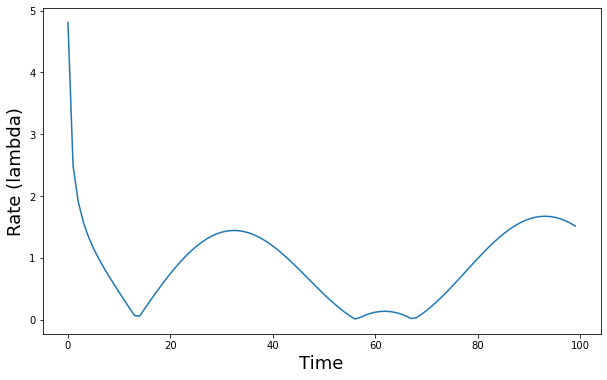

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(lambda1)
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Rate (lambda)", fontsize = 18)
plt.show()

In [28]:
from scipy.stats import bernoulli
from collections import Counter

In [119]:
time = np.linspace(0.01, 10, 100)
p_list = np.linspace(0, 1, 100)
eventsP = [] # nb de succés p
eventsQ = [] # nb echecs 1-p = q
probas = []

for t in time:
    p = round(random.choice(proba_list), 3)
    rvs =  bernoulli.rvs(p, size = 100)
    probas.append(p)
    eventsP.append(Counter(rvs)[1]) 
    eventsQ.append(Counter(rvs)[0])

print("Les probabilites p : ", probas, "\n") 
print("Nombre de succes : ", eventsP, "\n") 
print("Nombre d'echecs : ", eventsQ)

Les probabilites p :  [0.919, 0.929, 0.798, 0.141, 0.939, 0.576, 0.03, 0.525, 0.636, 0.788, 0.182, 0.566, 0.162, 0.495, 0.758, 0.556, 0.131, 0.263, 0.636, 0.182, 0.414, 0.909, 0.404, 0.677, 0.737, 0.747, 0.485, 0.747, 0.889, 0.434, 0.879, 0.515, 0.323, 0.818, 0.828, 0.343, 0.596, 0.606, 0.101, 0.081, 0.232, 0.141, 0.495, 0.859, 0.222, 0.818, 1.0, 0.182, 0.687, 0.495, 0.596, 0.636, 1.0, 0.566, 0.596, 0.535, 0.475, 0.909, 0.242, 0.192, 0.798, 0.01, 0.606, 0.283, 0.515, 0.232, 0.697, 0.02, 0.505, 0.071, 0.636, 0.061, 0.455, 0.242, 0.162, 0.899, 0.475, 0.283, 0.152, 0.525, 0.485, 0.081, 0.02, 0.01, 0.576, 0.657, 0.545, 0.0, 0.97, 0.283, 0.697, 0.051, 0.808, 0.273, 0.505, 0.889, 0.495, 0.636, 0.626, 0.131] 

Nombre de succes :  [90, 84, 78, 11, 96, 56, 2, 54, 74, 84, 13, 53, 10, 54, 73, 66, 14, 23, 61, 18, 45, 93, 40, 67, 76, 75, 50, 70, 93, 47, 83, 49, 34, 84, 84, 32, 64, 64, 3, 14, 18, 12, 55, 84, 24, 82, 100, 18, 72, 49, 55, 57, 100, 56, 55, 56, 45, 89, 21, 18, 78, 1, 55, 28, 47, 24, 68,

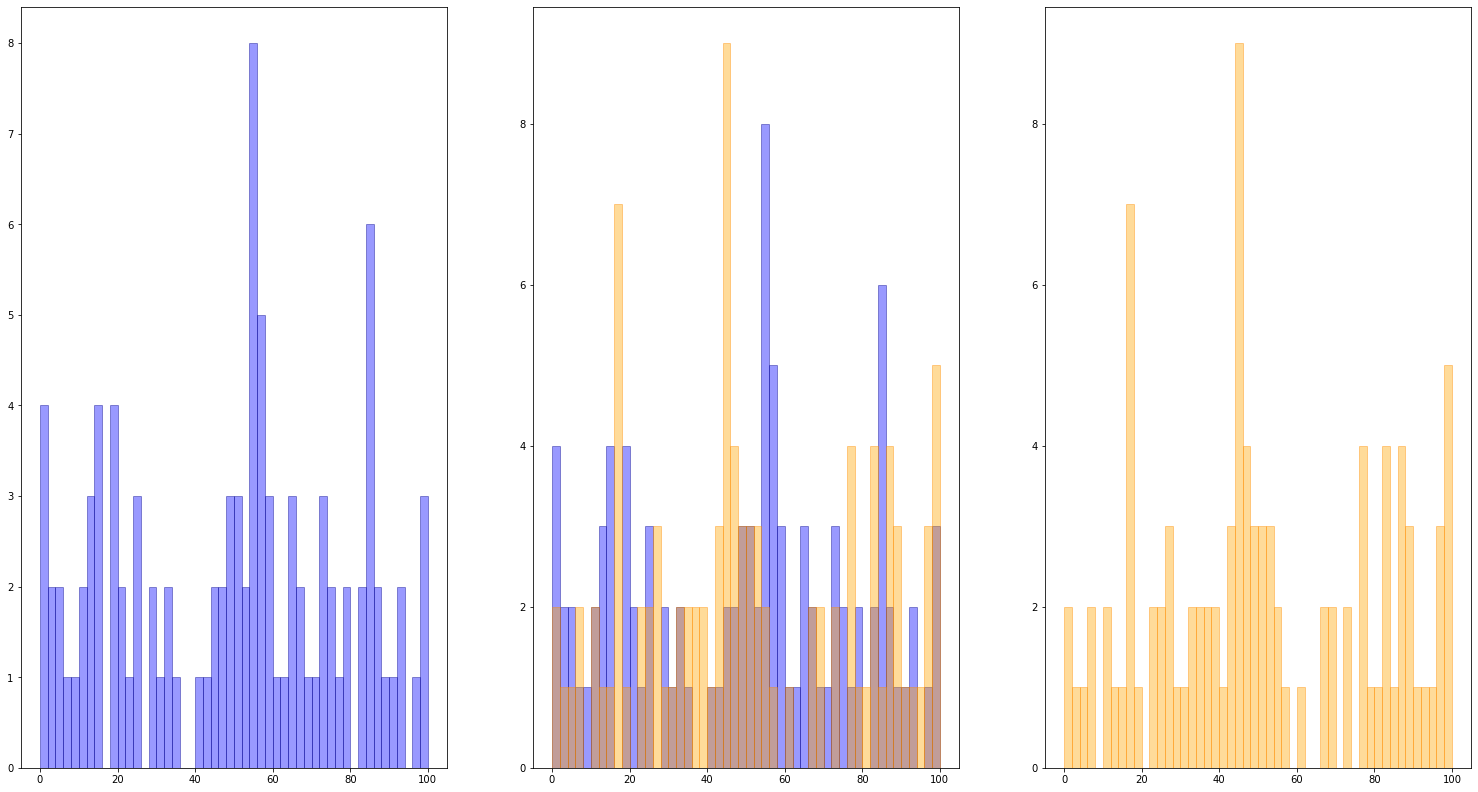

In [120]:
plt.figure(figsize=(26, 14))

plt.subplot(1,3,1)
plt.hist(eventsP, alpha=0.4, bins = 50, color = "blue", edgecolor = "darkblue")

plt.subplot(1,3,2)
plt.hist(eventsP, alpha=0.4, bins = 50, color = "blue", edgecolor = "darkblue")
plt.hist(eventsQ, alpha = 0.4, bins = 50, color = "orange", edgecolor = "darkorange")

plt.subplot(1,3,3)
plt.hist(eventsQ, alpha = 0.4, bins = 50, color = "orange", edgecolor = "darkorange")

plt.show()

In [127]:
lambda_ = 0.5
lambdaP = []
lambdaQ = []

for p in probas:
    lambdaP.append(lambda_ * p)
    lambdaQ.append(lambda_ * (1- p))

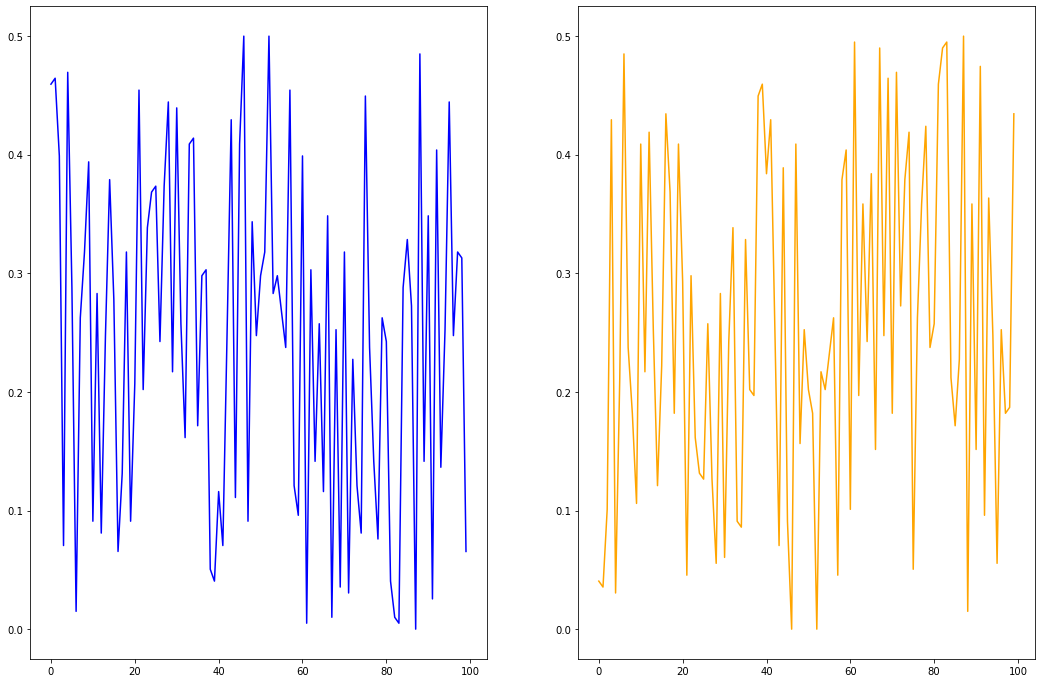

In [129]:
plt.figure(figsize=(18, 12))

plt.subplot(1,2,1)
plt.plot(lambdaP, color = "blue")

plt.subplot(1,2,2)
plt.plot(lambdaQ, color="orange")

plt.show()